# Heart Failure Prediction Using all features

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [6]:
mean = df.mean()

In [7]:
mean

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

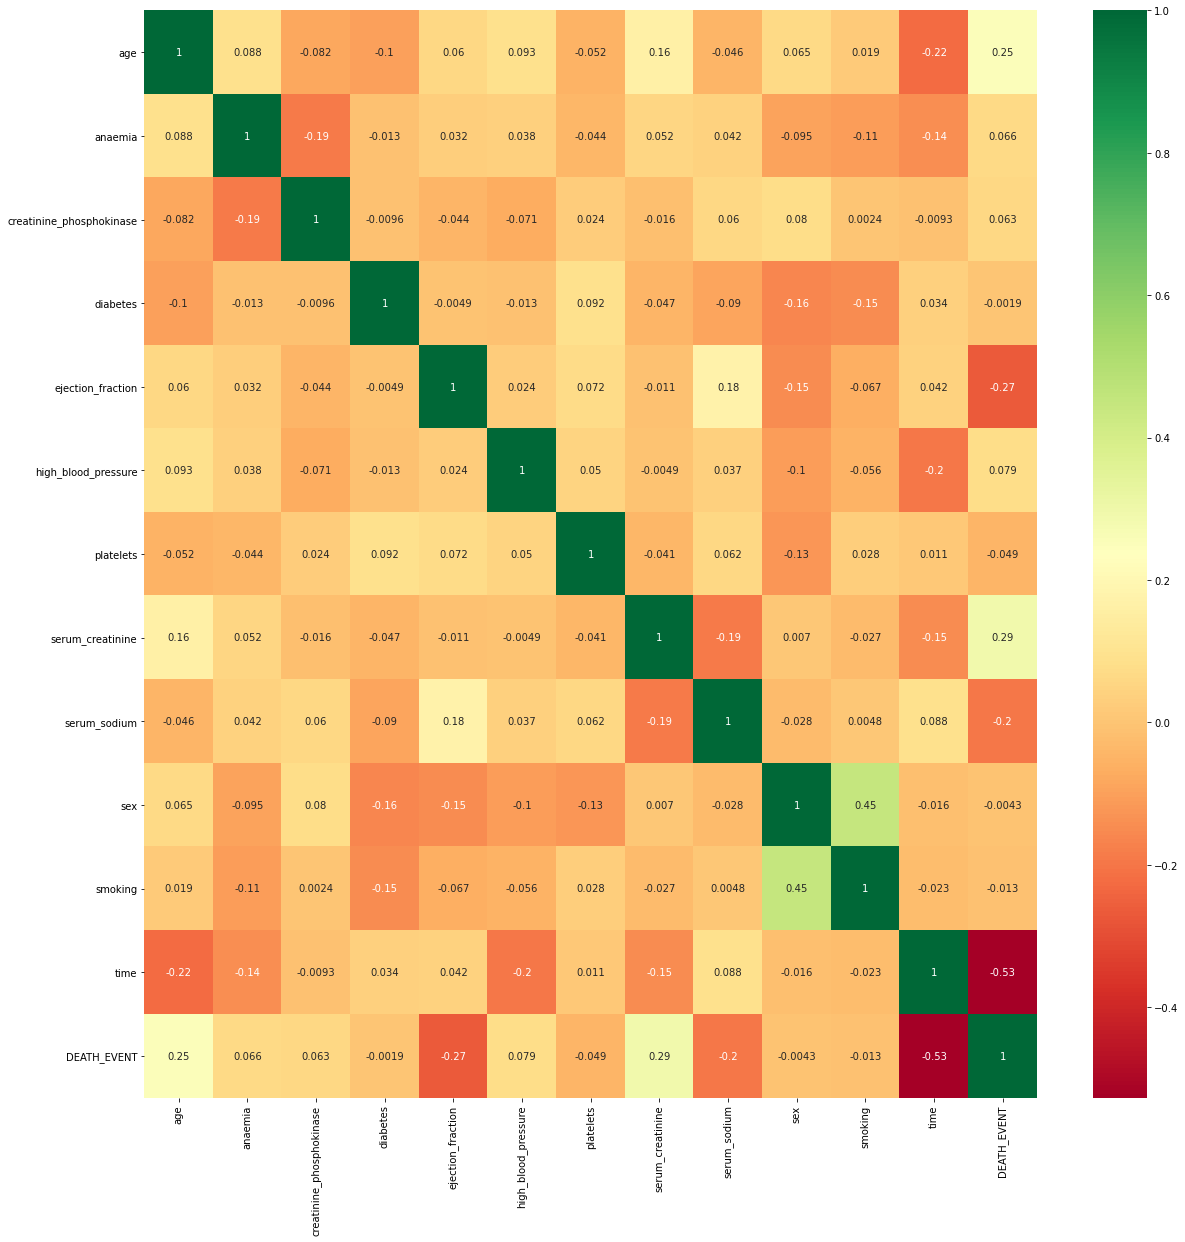

In [9]:
heart_corr = df.corr()
top_corr_features = heart_corr.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn")

<ipython-input-10-542b94a88fa6>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  s = df.hist(ax = ax)


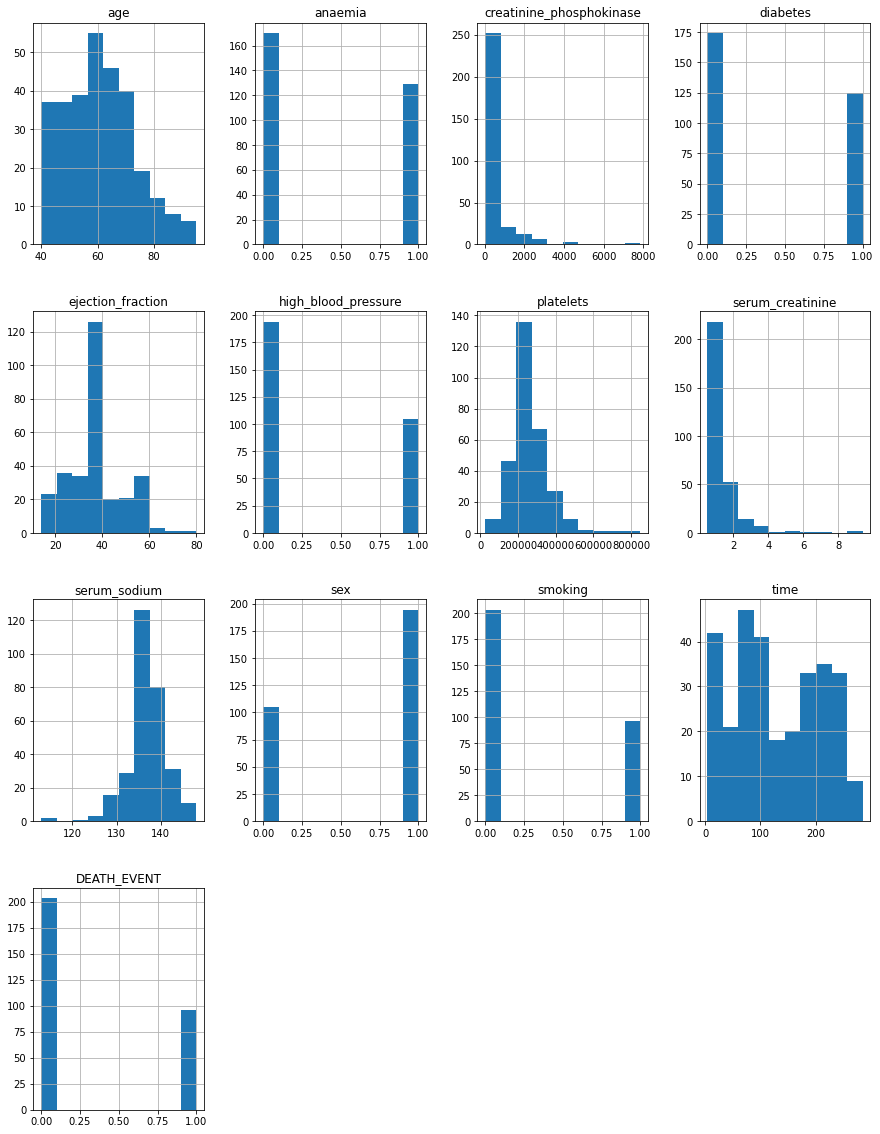

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
s = df.hist(ax = ax)

In [11]:
target = df.DEATH_EVENT

In [12]:
target

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [13]:
target.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [14]:
heart = df.drop('DEATH_EVENT', axis = 'columns')

In [15]:
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart, target, test_size = 0.2)

In [17]:
len(X_train), len(X_test)

(239, 60)

## Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predict_y = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
print("Decision Tree Classifier Model Score is:", accuracy_score(y_test, predict_y))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_y))
print("Precision Score is:", precision_score(y_test, predict_y))
print("Recall Score is:", recall_score(y_test, predict_y))
print("F1 Score is:", f1_score(y_test, predict_y))
print("MCC Score is:", matthews_corrcoef(y_test, predict_y))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_y))

Decision Tree Classifier Model Score is: 0.7333333333333333
Confusion Matrix is: [[32  9]
 [ 7 12]]
Precision Score is: 0.5714285714285714
Recall Score is: 0.631578947368421
F1 Score is: 0.6
MCC Score is: 0.40187811143212326
ROC-AUC Score is: 0.7060333761232349


## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict_R = model.predict(X_test)

In [21]:
print("Random Forest Classifier Model Score is:", accuracy_score(y_test, predict_R))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_R))
print("Precision Score is:", precision_score(y_test, predict_R))
print("Recall Score is:", recall_score(y_test, predict_R))
print("F1 Score is:", f1_score(y_test, predict_R))
print("MCC Score is:", matthews_corrcoef(y_test, predict_R))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_R))

Random Forest Classifier Model Score is: 0.8333333333333334
Confusion Matrix is: [[38  3]
 [ 7 12]]
Precision Score is: 0.8
Recall Score is: 0.631578947368421
F1 Score is: 0.7058823529411765
MCC Score is: 0.5998858827434879
ROC-AUC Score is: 0.7792041078305519


## Logistic Regression Classifier

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predict_L = model.predict(X_test)

In [23]:
print("Logistic Regression Classifier Model Score is:", accuracy_score(y_test, predict_L))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_L))
print("Precision Score is:", precision_score(y_test, predict_L))
print("Recall Score is:", recall_score(y_test, predict_L))
print("F1 Score is:", f1_score(y_test, predict_L))
print("MCC Score is:", matthews_corrcoef(y_test, predict_L))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_L))

Logistic Regression Classifier Model Score is: 0.7666666666666667
Confusion Matrix is: [[36  5]
 [ 9 10]]
Precision Score is: 0.6666666666666666
Recall Score is: 0.5263157894736842
F1 Score is: 0.5882352941176471
MCC Score is: 0.4344001219866636
ROC-AUC Score is: 0.7021822849807445


## K-Nearest Neighbors Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predict_K = model.predict(X_test)

In [25]:
print("KNN Classifier Model Score is:", accuracy_score(y_test, predict_K))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_K))
print("Precision Score is:", precision_score(y_test, predict_K))
print("Recall Score is:", recall_score(y_test, predict_K))
print("F1 Score is:", f1_score(y_test, predict_K))
print("MCC Score is:", matthews_corrcoef(y_test, predict_K))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_K))

KNN Classifier Model Score is: 0.5666666666666667
Confusion Matrix is: [[33  8]
 [18  1]]
Precision Score is: 0.1111111111111111
Recall Score is: 0.05263157894736842
F1 Score is: 0.07142857142857142
MCC Score is: -0.18562988994143362
ROC-AUC Score is: 0.4287548138639281


## Gradient Boosting Classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predict_G = model.predict(X_test)

In [27]:
print("Gradient Boosting Classifier Model Score is:", accuracy_score(y_test, predict_G))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_G))
print("Precision Score is:", precision_score(y_test, predict_G))
print("Recall Score is:", recall_score(y_test, predict_G))
print("F1 Score is:", f1_score(y_test, predict_G))
print("MCC Score is:", matthews_corrcoef(y_test, predict_G))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_G))

Gradient Boosting Classifier Model Score is: 0.8833333333333333
Confusion Matrix is: [[39  2]
 [ 5 14]]
Precision Score is: 0.875
Recall Score is: 0.7368421052631579
F1 Score is: 0.7999999999999999
MCC Score is: 0.7237852548306585
ROC-AUC Score is: 0.8440308087291399


## ANN Classifier

In [28]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)
predict_A = model.predict(X_test)

In [29]:
print("ANN Model Score is:", accuracy_score(y_test, predict_A))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_A))
print("Precision Score is:", precision_score(y_test, predict_A))
print("Recall Score is:", recall_score(y_test, predict_A))
print("F1 Score is:", f1_score(y_test, predict_A))
print("MCC Score is:", matthews_corrcoef(y_test, predict_A))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_A))

ANN Model Score is: 0.6833333333333333
Confusion Matrix is: [[41  0]
 [19  0]]
Precision Score is: 0.0
Recall Score is: 0.0
F1 Score is: 0.0
MCC Score is: 0.0
ROC-AUC Score is: 0.5


c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


## Naïve Bayes Classifier

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predict_N = model.predict(X_test)

In [31]:
print("Naïve Bayes Classifier Model Score is:", accuracy_score(y_test, predict_N))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_N))
print("Precision Score is:", precision_score(y_test, predict_N))
print("Recall Score is:", recall_score(y_test, predict_N))
print("F1 Score is:", f1_score(y_test, predict_N))
print("MCC Score is:", matthews_corrcoef(y_test, predict_N))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_N))

Naïve Bayes Classifier Model Score is: 0.8166666666666667
Confusion Matrix is: [[39  2]
 [ 9 10]]
Precision Score is: 0.8333333333333334
Recall Score is: 0.5263157894736842
F1 Score is: 0.6451612903225806
MCC Score is: 0.5553451320225145
ROC-AUC Score is: 0.738767650834403


## Model Accuracy of all Classification Algorithms

In [32]:
print("Decision Tree Classifier Model Score is:", accuracy_score(y_test, predict_y))
print("Random Forest Classifier Model Score is:", accuracy_score(y_test, predict_R))
print("Logistic Regression Classifier Model Score is:", accuracy_score(y_test, predict_L))
print("KNN Classifier Model Score is:", accuracy_score(y_test, predict_K))
print("Gradient Boosting Classifier Model Score is:", accuracy_score(y_test, predict_G))
print("ANN Model Score is:", accuracy_score(y_test, predict_A))
print("Naïve Bayes Classifier Model Score is:", accuracy_score(y_test, predict_N))

Decision Tree Classifier Model Score is: 0.7333333333333333
Random Forest Classifier Model Score is: 0.8333333333333334
Logistic Regression Classifier Model Score is: 0.7666666666666667
KNN Classifier Model Score is: 0.5666666666666667
Gradient Boosting Classifier Model Score is: 0.8833333333333333
ANN Model Score is: 0.6833333333333333
Naïve Bayes Classifier Model Score is: 0.8166666666666667


# Heart Failure Prediction using two features 
* Serum Cretinine
* Injection Fraction

In [33]:
df.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [34]:
drop = df.drop(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'high_blood_pressure', 'platelets',
        'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], axis = 'columns')

In [35]:
drop

,ejection_fraction,serum_creatinine
0,20,1.9
1,38,1.1
2,20,1.3
3,20,1.9
4,20,2.7
...,...,...
294,38,1.1
295,38,1.2
296,60,0.8
297,38,1.4


In [36]:
X_traini, X_testi, y_traini, y_testi = train_test_split(drop, target, test_size = 0.2)
len(X_traini), len(X_testi)

(239, 60)

## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_traini, y_traini)
predict_d = model.predict(X_testi)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
print("Decision Tree Classifier Model Score is:", accuracy_score(y_testi, predict_d))
print("Confusion Matrix is:", confusion_matrix(y_testi, predict_d))
print("Precision Score is:", precision_score(y_testi, predict_d))
print("Recall Score is:", recall_score(y_testi, predict_d))
print("F1 Score is:", f1_score(y_testi, predict_d))
print("MCC Score is:", matthews_corrcoef(y_testi, predict_d))
print("ROC-AUC Score is:", roc_auc_score(y_testi, predict_d))

Decision Tree Classifier Model Score is: 0.7166666666666667
Confusion Matrix is: [[31  6]
 [11 12]]
Precision Score is: 0.6666666666666666
Recall Score is: 0.5217391304347826
F1 Score is: 0.5853658536585366
MCC Score is: 0.38150105974497217
ROC-AUC Score is: 0.6797884841363103


## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_traini, y_traini)
predict_r = model.predict(X_testi)

In [40]:
print("Random Forest Classifier Model Score is:", accuracy_score(y_testi, predict_r))
print("Confusion Matrix is:", confusion_matrix(y_testi, predict_r))
print("Precision Score is:", precision_score(y_testi, predict_r))
print("Recall Score is:", recall_score(y_testi, predict_r))
print("F1 Score is:", f1_score(y_testi, predict_r))
print("MCC Score is:", matthews_corrcoef(y_testi, predict_r))
print("ROC-AUC Score is:", roc_auc_score(y_testi, predict_r))

Random Forest Classifier Model Score is: 0.7166666666666667
Confusion Matrix is: [[30  7]
 [10 13]]
Precision Score is: 0.65
Recall Score is: 0.5652173913043478
F1 Score is: 0.6046511627906976
MCC Score is: 0.3878289324509757
ROC-AUC Score is: 0.6880141010575792


## Logistic Regression Classifier

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_traini, y_traini)
predict_l = model.predict(X_testi)

In [42]:
print("Logistic Regression Classifier Model Score is:", accuracy_score(y_testi, predict_l))
print("Confusion Matrix is:", confusion_matrix(y_testi, predict_l))
print("Precision Score is:", precision_score(y_testi, predict_l))
print("Recall Score is:", recall_score(y_testi, predict_l))
print("F1 Score is:", f1_score(y_testi, predict_l))
print("MCC Score is:", matthews_corrcoef(y_testi, predict_l))
print("ROC-AUC Score is:", roc_auc_score(y_testi, predict_l))

Logistic Regression Classifier Model Score is: 0.7166666666666667
Confusion Matrix is: [[35  2]
 [15  8]]
Precision Score is: 0.8
Recall Score is: 0.34782608695652173
F1 Score is: 0.48484848484848486
MCC Score is: 0.38325711533020995
ROC-AUC Score is: 0.6468860164512338


## K-Nearest Neighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_traini, y_traini)
predict_k = model.predict(X_testi)

In [44]:
print("KNN Classifier Model Score is:", accuracy_score(y_testi, predict_k))
print("Confusion Matrix is:", confusion_matrix(y_testi, predict_k))
print("Precision Score is:", precision_score(y_testi, predict_k))
print("Recall Score is:", recall_score(y_testi, predict_k))
print("F1 Score is:", f1_score(y_testi, predict_k))
print("MCC Score is:", matthews_corrcoef(y_testi, predict_k))
print("ROC-AUC Score is:", roc_auc_score(y_testi, predict_k))

KNN Classifier Model Score is: 0.75
Confusion Matrix is: [[29  8]
 [ 7 16]]
Precision Score is: 0.6666666666666666
Recall Score is: 0.6956521739130435
F1 Score is: 0.6808510638297872
MCC Score is: 0.47581541941895394
ROC-AUC Score is: 0.7397179788484136


## Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_traini, y_traini)
predict_g = model.predict(X_testi)

In [46]:
print("Gradient Boosting Classifier Model Score is:", accuracy_score(y_testi, predict_g))
print("Confusion Matrix is:", confusion_matrix(y_testi, predict_g))
print("Precision Score is:", precision_score(y_testi, predict_g))
print("Recall Score is:", recall_score(y_testi, predict_g))
print("F1 Score is:", f1_score(y_testi, predict_g))
print("MCC Score is:", matthews_corrcoef(y_testi, predict_g))
print("ROC-AUC Score is:", roc_auc_score(y_testi, predict_g))

Gradient Boosting Classifier Model Score is: 0.8
Confusion Matrix is: [[35  2]
 [10 13]]
Precision Score is: 0.8666666666666667
Recall Score is: 0.5652173913043478
F1 Score is: 0.6842105263157895
MCC Score is: 0.5739480576625673
ROC-AUC Score is: 0.7555816686251468


## ANN Classifier

In [47]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_traini, y_traini)
predict_a = model.predict(X_testi)

In [48]:
print("ANN Model Score is:", accuracy_score(y_testi, predict_a))
print("Confusion Matrix is:", confusion_matrix(y_testi, predict_a))
print("Precision Score is:", precision_score(y_testi, predict_a))
print("Recall Score is:", recall_score(y_testi, predict_a))
print("F1 Score is:", f1_score(y_testi, predict_a))
print("MCC Score is:", matthews_corrcoef(y_testi, predict_a))
print("ROC-AUC Score is:", roc_auc_score(y_testi, predict_a))

ANN Model Score is: 0.7166666666666667
Confusion Matrix is: [[35  2]
 [15  8]]
Precision Score is: 0.8
Recall Score is: 0.34782608695652173
F1 Score is: 0.48484848484848486
MCC Score is: 0.38325711533020995
ROC-AUC Score is: 0.6468860164512338


## Naïve Bayes Classifier

In [49]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_traini, y_traini)
predict_n = model.predict(X_testi)

In [50]:
print("Naïve Bayes Classifier Model Score is:", accuracy_score(y_testi, predict_n))
print("Confusion Matrix is:", confusion_matrix(y_testi, predict_n))
print("Precision Score is:", precision_score(y_testi, predict_n))
print("Recall Score is:", recall_score(y_testi, predict_n))
print("F1 Score is:", f1_score(y_testi, predict_n))
print("MCC Score is:", matthews_corrcoef(y_testi, predict_n))
print("ROC-AUC Score is:", roc_auc_score(y_testi, predict_n))

Naïve Bayes Classifier Model Score is: 0.6666666666666666
Confusion Matrix is: [[35  2]
 [18  5]]
Precision Score is: 0.7142857142857143
Recall Score is: 0.21739130434782608
F1 Score is: 0.3333333333333333
MCC Score is: 0.24737913431389685
ROC-AUC Score is: 0.581668625146886


## Model Accuracy of all Classification Algorithms

In [51]:
print("Decision Tree Classifier Model Score is:", accuracy_score(y_test, predict_d))
print("Random Forest Classifier Model Score is:", accuracy_score(y_test, predict_r))
print("Logistic Regression Classifier Model Score is:", accuracy_score(y_test, predict_l))
print("KNN Classifier Model Score is:", accuracy_score(y_test, predict_k))
print("Gradient Boosting Classifier Model Score is:", accuracy_score(y_test, predict_g))
print("ANN Model Score is:", accuracy_score(y_test, predict_a))
print("Naïve Bayes Classifier Model Score is:", accuracy_score(y_test, predict_n))

Decision Tree Classifier Model Score is: 0.6833333333333333
Random Forest Classifier Model Score is: 0.65
Logistic Regression Classifier Model Score is: 0.5833333333333334
KNN Classifier Model Score is: 0.6166666666666667
Gradient Boosting Classifier Model Score is: 0.6666666666666666
ANN Model Score is: 0.5833333333333334
Naïve Bayes Classifier Model Score is: 0.6333333333333333
